In [ ]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D
from keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from keras.utils import to_categorical# to make the examplereplicable
np.random.seed(42)# Load of the dataset
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


##Load dataset

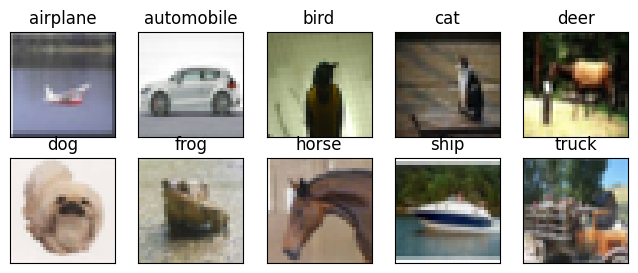

In [ ]:
import matplotlib.pyplot as plt
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(len(class_names)):
  ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
  idx = np.where(Y_train[:]==i)[0]
  features_idx = X_train[idx,::]
  img_num = np.random.randint(features_idx.shape[0])
  im = features_idx[img_num,::]
  ax.set_title(class_names[i])
  #im = np.transpose(features_idx[img_num,::], (1, 2, 0))
  plt.imshow(im)
plt.show()
# Initializing the model



## Initializing the model


In [ ]:
model = Sequential()

# Defining a convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',
                 input_shape=(32, 32, 3)))
# Defining a second convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

#Defining a third convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

# We add our classificator
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])# Training of the model
model.fit(X_train, to_categorical(Y_train),
          batch_size=128,
          shuffle=True,
          epochs=10,
          validation_data=(X_test, to_categorical(Y_test)))

Epoch 1/10
391/391 [==============================] - 37s 63ms/step - loss: 8.2855 - accuracy: 0.1008 - val_loss: 2.3026 - val_accuracy: 0.0999
Epoch 2/10
391/391 [==============================] - 24s 63ms/step - loss: 2.3034 - accuracy: 0.1010 - val_loss: 2.3026 - val_accuracy: 0.1002
Epoch 3/10
391/391 [==============================] - 25s 63ms/step - loss: 2.3027 - accuracy: 0.0981 - val_loss: 2.3023 - val_accuracy: 0.0999
Epoch 4/10
391/391 [==============================] - 24s 62ms/step - loss: 2.3012 - accuracy: 0.0999 - val_loss: 2.3035 - val_accuracy: 0.1005
Epoch 5/10
391/391 [==============================] - 24s 62ms/step - loss: 2.2975 - accuracy: 0.0988 - val_loss: 2.3039 - val_accuracy: 0.1009
Epoch 6/10
391/391 [==============================] - 24s 62ms/step - loss: 2.2922 - accuracy: 0.1072 - val_loss: 2.3133 - val_accuracy: 0.1008
Epoch 7/10
391/391 [==============================] - 24s 62ms/step - loss: 2.2830 - accuracy: 0.1087 - val_loss: 2.3440 - val_accuracy:

##Evaluation of the model

In [ ]:
scores = model.evaluate(X_test, to_categorical(Y_test))
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

313/313 [==============================] - 2s 6ms/step - loss: 2.4257 - accuracy: 0.1028
Loss: 2.426
Accuracy: 0.103


##Cenetering the data

In [ ]:
X_train_mean = np.mean(X_train, axis = 0)
X_train_cent = X_train - X_train_mean # Normalization
X_train_std = np.std(X_train, axis = 0)
X_train_norm = X_train_cent / X_train_std

X_test_norm = (X_test - X_train_mean) / X_train_std

###Initializing the centered data model

In [ ]:
model = Sequential()

# Defining a convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))

# Defining a second convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

# Defining a third convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

# We add our classificator
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])
# Training of the model
model.fit(X_train_norm, to_categorical(Y_train),
          batch_size=128,
          shuffle=True,
          epochs=10,
          validation_data=(X_test_norm, to_categorical(Y_test)))

Epoch 1/10
391/391 [==============================] - 27s 66ms/step - loss: 1.6253 - accuracy: 0.4303 - val_loss: 1.3094 - val_accuracy: 0.5300
Epoch 2/10
391/391 [==============================] - 27s 68ms/step - loss: 1.1543 - accuracy: 0.5919 - val_loss: 1.0740 - val_accuracy: 0.6197
Epoch 3/10
391/391 [==============================] - 25s 65ms/step - loss: 0.8633 - accuracy: 0.6967 - val_loss: 1.0028 - val_accuracy: 0.6583
Epoch 4/10
391/391 [==============================] - 25s 64ms/step - loss: 0.5181 - accuracy: 0.8210 - val_loss: 1.0586 - val_accuracy: 0.6694
Epoch 5/10
391/391 [==============================] - 25s 65ms/step - loss: 0.1817 - accuracy: 0.9383 - val_loss: 1.4947 - val_accuracy: 0.6537
Epoch 6/10
391/391 [==============================] - 25s 64ms/step - loss: 0.0664 - accuracy: 0.9795 - val_loss: 1.8819 - val_accuracy: 0.6522
Epoch 7/10
391/391 [==============================] - 25s 64ms/step - loss: 0.0452 - accuracy: 0.9864 - val_loss: 2.0480 - val_accuracy:

###Evaluation

In [ ]:
scores = model.evaluate(X_test_norm, to_categorical(Y_test))
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

313/313 [==============================] - 2s 6ms/step - loss: 2.3842 - accuracy: 0.6528
Loss: 2.384
Accuracy: 0.653


##Batch Normalization

In [ ]:
from keras.layers import BatchNormalization, Activation

In [ ]:
model = Sequential()

# Defining a convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Defining a second convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Defining a third convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# We include our classifier
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

# Training the model
model.fit(X_train_norm, to_categorical(Y_train),
          batch_size=128,
          shuffle=True,
          epochs=10,
          validation_data=(X_test_norm, to_categorical(Y_test)))

#evaluate
scores = model.evaluate(X_test_norm, to_categorical(Y_test))
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

Epoch 1/10
391/391 [==============================] - 32s 76ms/step - loss: 3.2573 - accuracy: 0.4414 - val_loss: 1.4944 - val_accuracy: 0.4906
Epoch 2/10
391/391 [==============================] - 29s 74ms/step - loss: 1.0442 - accuracy: 0.6320 - val_loss: 1.1664 - val_accuracy: 0.5977
Epoch 3/10
391/391 [==============================] - 29s 74ms/step - loss: 0.6078 - accuracy: 0.7907 - val_loss: 1.3561 - val_accuracy: 0.5849
Epoch 4/10
391/391 [==============================] - 30s 77ms/step - loss: 0.2601 - accuracy: 0.9144 - val_loss: 1.7478 - val_accuracy: 0.5824
Epoch 5/10
391/391 [==============================] - 29s 74ms/step - loss: 0.1205 - accuracy: 0.9623 - val_loss: 2.0628 - val_accuracy: 0.5672
Epoch 6/10
391/391 [==============================] - 29s 74ms/step - loss: 0.0876 - accuracy: 0.9725 - val_loss: 2.1525 - val_accuracy: 0.5801
Epoch 7/10
391/391 [==============================] - 29s 74ms/step - loss: 0.0696 - accuracy: 0.9783 - val_loss: 2.4813 - val_accuracy:

## L2 Regularization

In [ ]:
from keras.regularizers import l2

In [ ]:
model = Sequential()

# Defining a convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))

# Defining a second convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

# Defining a third convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

# Classifier inclusion
model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(10, activation='softmax'))

# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

# Traning the model
model.fit(X_train_norm, to_categorical(Y_train),
          batch_size=128,
          shuffle=True,
          epochs=10,
          validation_data=(X_test_norm, to_categorical(Y_test)))#Evaluating the model

#evaluate
scores = model.evaluate(X_test_norm, to_categorical(Y_test))
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])


Epoch 1/10
391/391 [==============================] - 31s 77ms/step - loss: 2.5701 - accuracy: 0.3937 - val_loss: 1.6384 - val_accuracy: 0.4716
Epoch 2/10
391/391 [==============================] - 29s 73ms/step - loss: 1.6129 - accuracy: 0.4840 - val_loss: 1.5478 - val_accuracy: 0.5060
Epoch 3/10
391/391 [==============================] - 29s 75ms/step - loss: 1.5033 - accuracy: 0.5219 - val_loss: 1.5253 - val_accuracy: 0.5123
Epoch 4/10
391/391 [==============================] - 28s 73ms/step - loss: 1.4247 - accuracy: 0.5457 - val_loss: 1.3666 - val_accuracy: 0.5751
Epoch 5/10
391/391 [==============================] - 30s 76ms/step - loss: 1.3543 - accuracy: 0.5771 - val_loss: 1.2839 - val_accuracy: 0.5979
Epoch 6/10
391/391 [==============================] - 28s 72ms/step - loss: 1.2941 - accuracy: 0.5954 - val_loss: 1.3132 - val_accuracy: 0.5885
Epoch 7/10
391/391 [==============================] - 29s 75ms/step - loss: 1.2442 - accuracy: 0.6129 - val_loss: 1.2694 - val_accuracy:

##Dropout

In [ ]:
from keras.layers import Dropout

model = Sequential()

# Defining a convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',
input_shape=(32, 32, 3)))
model.add(Dropout(0.25))

# Defining a second convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.25))

# Defining a third convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.25))

# Classifier inclusion
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

# Traning the model
model.fit(X_train_norm, to_categorical(Y_train), batch_size=128,
          shuffle=True,
          epochs=10,
          validation_data=(X_test_norm, to_categorical(Y_test)))
#evaluate
scores = model.evaluate(X_test_norm, to_categorical(Y_test))
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])


Epoch 1/10
391/391 [==============================] - 33s 79ms/step - loss: 1.5578 - accuracy: 0.4438 - val_loss: 1.2462 - val_accuracy: 0.5565
Epoch 2/10
391/391 [==============================] - 30s 78ms/step - loss: 1.1962 - accuracy: 0.5751 - val_loss: 1.0711 - val_accuracy: 0.6267
Epoch 3/10
391/391 [==============================] - 31s 80ms/step - loss: 0.9977 - accuracy: 0.6518 - val_loss: 0.9524 - val_accuracy: 0.6689
Epoch 4/10
391/391 [==============================] - 30s 77ms/step - loss: 0.8451 - accuracy: 0.7058 - val_loss: 0.8997 - val_accuracy: 0.6918
Epoch 5/10
391/391 [==============================] - 30s 77ms/step - loss: 0.7190 - accuracy: 0.7508 - val_loss: 0.8818 - val_accuracy: 0.6962
Epoch 6/10
391/391 [==============================] - 30s 77ms/step - loss: 0.5999 - accuracy: 0.7932 - val_loss: 0.8575 - val_accuracy: 0.7068
Epoch 7/10
391/391 [==============================] - 32s 81ms/step - loss: 0.4854 - accuracy: 0.8320 - val_loss: 0.8532 - val_accuracy:

##Changing Kernel to 4x4



In [ ]:
from keras.layers import Dropout

# Inizializing the model
model = Sequential()

# Defining a convolutional layer
model.add(Conv2D(128, kernel_size=(4, 4), activation='relu',
input_shape=(32, 32, 3)))
model.add(Dropout(0.25))

# Defining a second convolutional layer
model.add(Conv2D(128, kernel_size=(4, 4), activation='relu'))
model.add(Dropout(0.25))

# Defining a third convolutional layer
model.add(Conv2D(128, kernel_size=(4, 4), activation='relu'))
model.add(Dropout(0.25))

# Classifier inclusion
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])# Traning the model
model.fit(X_train_norm, to_categorical(Y_train), batch_size=128,
          shuffle=True,
          epochs=10,
          validation_data=(X_test_norm, to_categorical(Y_test)))# Evaluating the model

#evaluate
scores = model.evaluate(X_test_norm, to_categorical(Y_test))
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

Epoch 1/10
391/391 [==============================] - 31s 73ms/step - loss: 2.3403 - accuracy: 0.0990 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
391/391 [==============================] - 27s 69ms/step - loss: 2.3027 - accuracy: 0.0977 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
391/391 [==============================] - 27s 69ms/step - loss: 2.3027 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
391/391 [==============================] - 27s 69ms/step - loss: 2.3027 - accuracy: 0.0996 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
391/391 [==============================] - 27s 69ms/step - loss: 2.3027 - accuracy: 0.0998 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
391/391 [==============================] - 27s 69ms/step - loss: 2.3027 - accuracy: 0.0965 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
391/391 [==============================] - 27s 69ms/step - loss: 2.3027 - accuracy: 0.0968 - val_loss: 2.3026 - val_accuracy:

##Learning rate to 0.01

In [ ]:
model = Sequential()

# Defining a convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',
input_shape=(32, 32, 3)))
model.add(Dropout(0.25))

# Defining a second convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.25))

# Defining a third convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.25))

# Classifier inclusion
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])# Traning the model
model.fit(X_train_norm, to_categorical(Y_train), batch_size=128,
          shuffle=True,
          epochs=10,
          validation_data=(X_test_norm, to_categorical(Y_test)))# Evaluating the model

#Evaluate
scores = model.evaluate(X_test_norm, to_categorical(Y_test))
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

Epoch 1/10
391/391 [==============================] - 32s 77ms/step - loss: 1.9774 - accuracy: 0.2920 - val_loss: 1.8062 - val_accuracy: 0.3437
Epoch 2/10
391/391 [==============================] - 30s 76ms/step - loss: 1.7195 - accuracy: 0.3655 - val_loss: 1.6079 - val_accuracy: 0.4096
Epoch 3/10
391/391 [==============================] - 31s 79ms/step - loss: 1.4702 - accuracy: 0.4606 - val_loss: 1.2518 - val_accuracy: 0.5536
Epoch 4/10
391/391 [==============================] - 30s 76ms/step - loss: 1.1300 - accuracy: 0.5970 - val_loss: 1.0223 - val_accuracy: 0.6341
Epoch 5/10
391/391 [==============================] - 30s 76ms/step - loss: 0.8708 - accuracy: 0.6949 - val_loss: 0.9508 - val_accuracy: 0.6759
Epoch 6/10
391/391 [==============================] - 30s 76ms/step - loss: 0.6375 - accuracy: 0.7779 - val_loss: 0.9197 - val_accuracy: 0.6874
Epoch 7/10
391/391 [==============================] - 30s 76ms/step - loss: 0.4329 - accuracy: 0.8485 - val_loss: 0.9998 - val_accuracy: